In [9]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()


In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape



(60000, 784)

In [18]:
X_test = X_test.reshape(X_test.shape[0], 784)
X_test.shape

(10000, 784)

In [16]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

modelpath = "./model_optimization/mnist_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
1459/1500 [============================>.] - ETA: 0s - loss: 0.4376 - accuracy: 0.8841
Epoch 1: val_loss improved from inf to 0.40489, saving model to ./model_optimization\mnist_MLP.hdf5
1500/1500 [==============================] - 1s 730us/step - loss: 0.4377 - accuracy: 0.8839 - val_loss: 0.4049 - val_accuracy: 0.8945
Epoch 2/100
1485/1500 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.8849
Epoch 2: val_loss improved from 0.40489 to 0.40099, saving model to ./model_optimization\mnist_MLP.hdf5
1500/1500 [==============================] - 1s 709us/step - loss: 0.4332 - accuracy: 0.8847 - val_loss: 0.4010 - val_accuracy: 0.8948
Epoch 3/100
1412/1500 [===========================>..] - ETA: 0s - loss: 0.4296 - accuracy: 0.8850
Epoch 3: val_loss improved from 0.40099 to 0.39737, saving model to ./model_optimization\mnist_MLP.hdf5
1500/1500 [==============================] - 1s 710us/step - loss: 0.4290 - accuracy: 0.8856 - val_loss: 0.3974 - val_accurac

In [28]:
score = model.evaluate(X_test, y_test)
print(f"accuracy : {round(score[1],2)}")

313/313 [==============================] - 0s 552us/step - loss: 0.3076 - accuracy: 0.9157
accuracy : 0.92


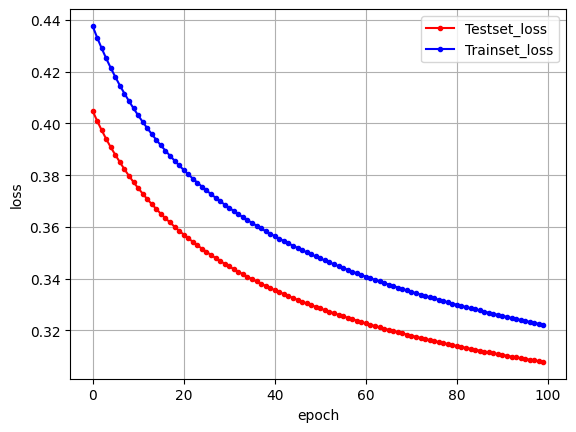

In [31]:
import numpy as np
import matplotlib.pyplot as plt

y_val_loss = history.history["val_loss"]
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_val_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()